In [19]:
import torch
import numpy as np
from torchvision.transforms import transforms as T
from torch.utils.data import DataLoader
from model import initialize_model
from data import TrashDataset

In [9]:
MODEL_NAME = "resnet"
NUM_CLASSES = 6
WEIGHTS = "outputs/2021-08-28-20-11-07/best_weights.pth"
DATA = "trash-data/dataset-resized"

In [5]:
%%capture
# Get model
model, input_size = initialize_model(MODEL_NAME, NUM_CLASSES, False, False)
model.load_state_dict(torch.load(WEIGHTS))
model.eval()

In [16]:
# Create Dataset 
dataset = TrashDataset(DATA, transform=T.ToTensor())
LABELS = list(dataset.label_dict.keys())
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)
data_iterator = iter(data_loader)

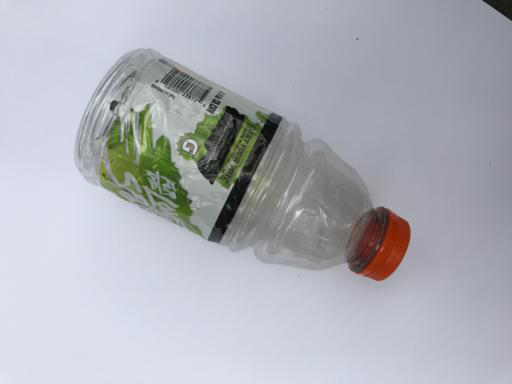

Label: plastic
Predi: plastic


In [70]:
# Predict images
convert_to_pil = T.ToPILImage()
img, label = next(data_iterator)
pred_tensor = model(img)
_, pred = torch.max(pred_tensor, 1)

pil_img = convert_to_pil(img[0])
display(pil_img)

print("Label: {}".format(LABELS[label]))
print("Predi: {}".format(LABELS[pred[0]]))